# Assessing investment risk using Monte Carlo simulation

## Probable Title:
Assessing investment risk using Monte Carlo simulation

## Question:
How does a change in volatility effect the risk of an investment?

## Hypothesis:
If the volatility increases, then the risk of of an investment also increases, because higher volatility leads to a greater range of potential outcomes, which increases uncertainty and the likelihood of experiencing extreme events.

## Procedure
We will simulate to invest a fixed amount of money over a fixed amount of time, with a fixed annual return rate. 
The annual return rate will have some variation, which is given by the so called "volatility rate".
The experiment consists in simulating a large number of investments with a given volatility rate to get a set of potential outcomes of the investment.
We will then run the experiment with different volatility rates (from low volatility to high volatility) and compare the potential outcomes and risks associated with each volatility rate.
This is called a Monte Carlo simulation.

## What is your inependent variable (what will you be testing)?
The independent variable is the volatility rate. We will test different volatility rates, while leaving the amount of invested money, the time of the investment, and the annual return rate fix.

## What is your dependent variable (what will you be measuring)?
We will measure the range of the potential outcomes per volatility rate as well as the "Value at Risk" (VaR), which is an estimate of the maximum loss that the investment may experience.

## What will be your constant variables (things that are the same in each experiment sample)?
The amount of invested money, the time of the investment, and the annual return rate will stay the same between all the experiments.

## Projected Material List:
- Computer
- Dart Board (maybe)

In [1]:
import numpy as np

In [2]:
# Simulation parameters

# We start with $1000:
initial_investment = 1000

# We invest the money over these many years:
years = 10                      # 

# On average we earn 7% each year
annual_return = 0.07

# But it's not exaclty 7% every year. Some years it's a liitle more, other years it's a little less ...
# How much "more" or "less" is determined by the "volatility" parameter: 
# for example: 
# if the volatility is 0.02 (2%), then some years we may earn up to 9% (0.07 + 0.02), 
# and other years we may earn only 5% (0.07 - 0.02)
volatility = 0.02 

# However, we assume that the annual return is mostly in the neighborhood of 7%, (7.1%, 6.9%, 7.25%, 6.92%, ...) and that 
# an annual return of 9% or 5% will not happen all that often
randomized_annual_growth = np.random.normal

# For a given volatility value we will run this many simulations of a 10 year investment
num_simulations = 1000

In [3]:
# Unimportant things needed to draw the graphs
import matplotlib.pyplot as plt

figsize = (20, 6)
np.random.seed(42)

def plot_simulation(simulations):
    plt.figure(figsize=figsize)
    for sim in simulations:
        plt.plot(sim)
    plt.title(f'Monte Carlo Simulation of Investment Portfolio with Annual Return of {int(annual_return*100)}% and volatility of {int(volatility*100)}%')
    plt.xlabel('Years')
    plt.ylabel('Portfolio Value')
    plt.xticks(range(0, years + 1))
    plt.show()
    
def plot_return_distribution(returns, var):
    bin_size = 200
    xrange = range(-2000, 2100, bin_size)
    width = bin_size - 10*bin_size / 100
    height = bin_size + 100

    plt.figure(figsize=figsize)
    plt.title('Simulated Returns and Value at Risk (VaR)')
    plt.ylabel('Number of Simulations')
    plt.xlabel('Portfolio Value')
    plt.xticks(xrange)
    ax = plt.gca()
    ax.set_ylim([0, height])
    ax.tick_params(axis='x', rotation=45)
    plt.hist(returns, bins=xrange, width=width)
    plt.axvline(x=var, color='red', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level*100}%')
    plt.legend()
    plt.show()


Volatility: 5.0%


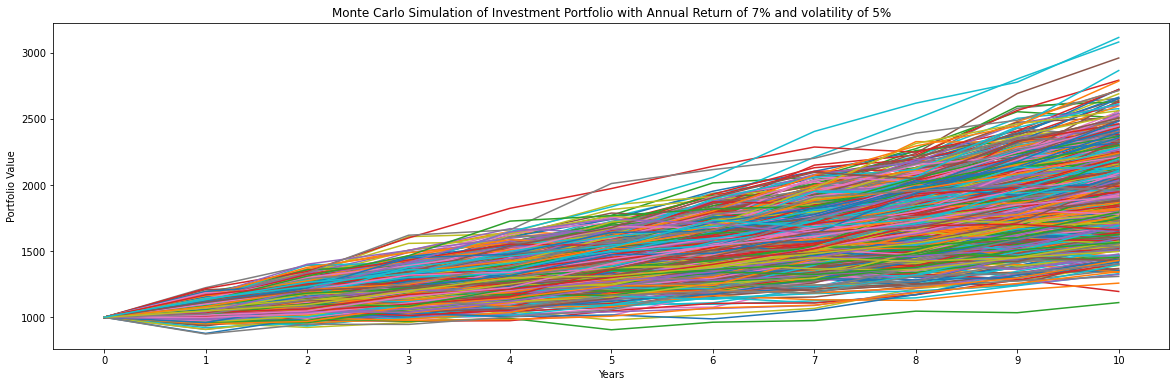

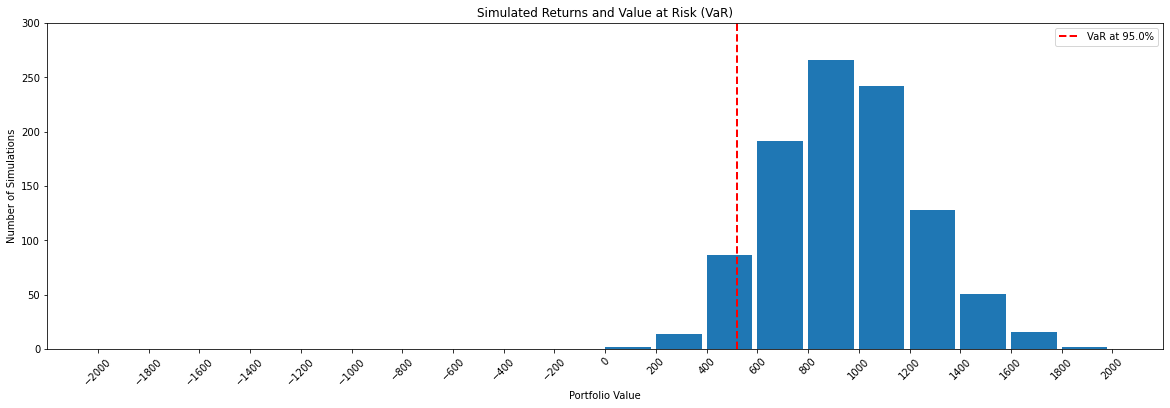

Value at Risk (VaR) at 95.0% confidence level: 519.874551700972
Volatility: 15.0%


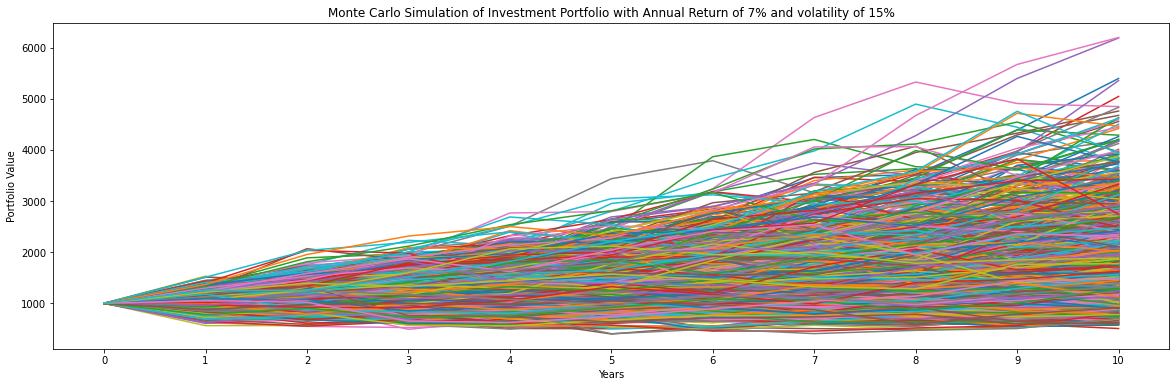

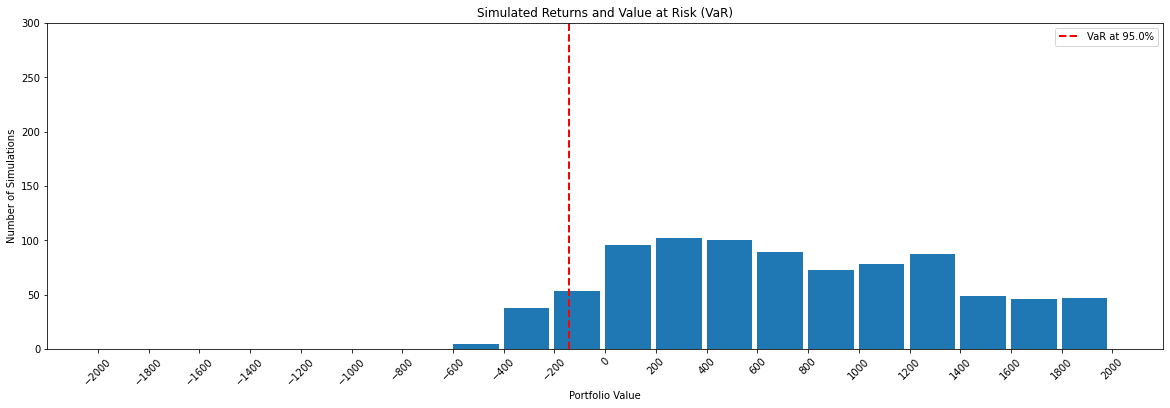

Value at Risk (VaR) at 95.0% confidence level: -141.71043839661763
Volatility: 20.0%


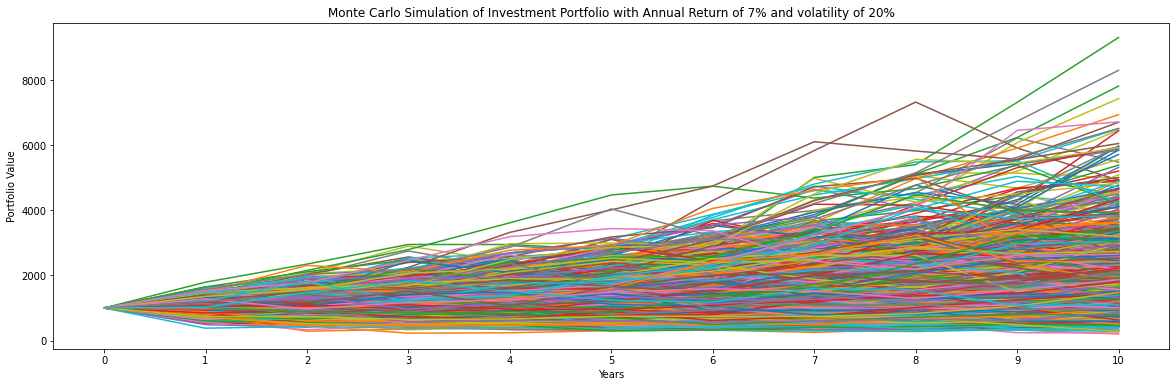

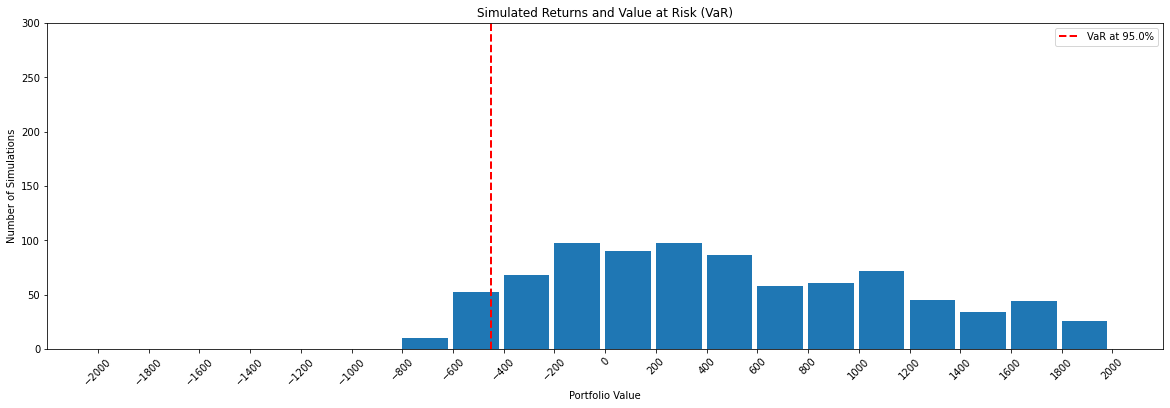

Value at Risk (VaR) at 95.0% confidence level: -449.6720769378768
Volatility: 30.0%


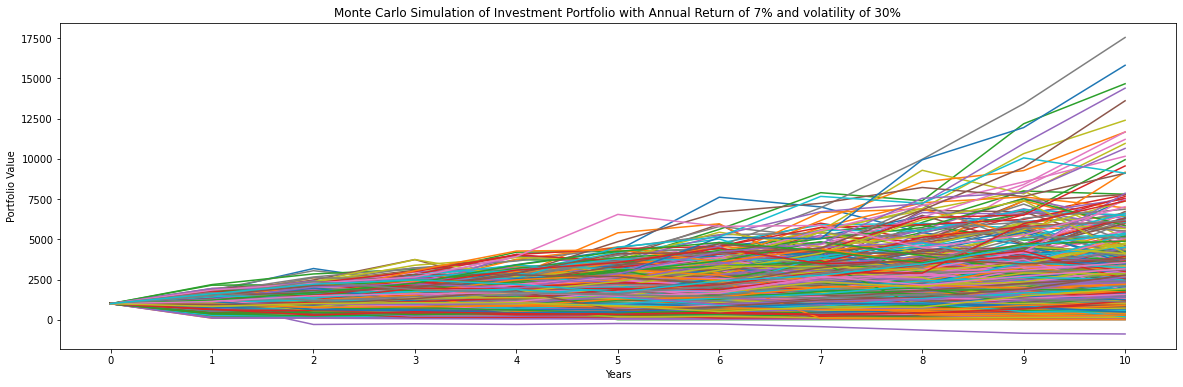

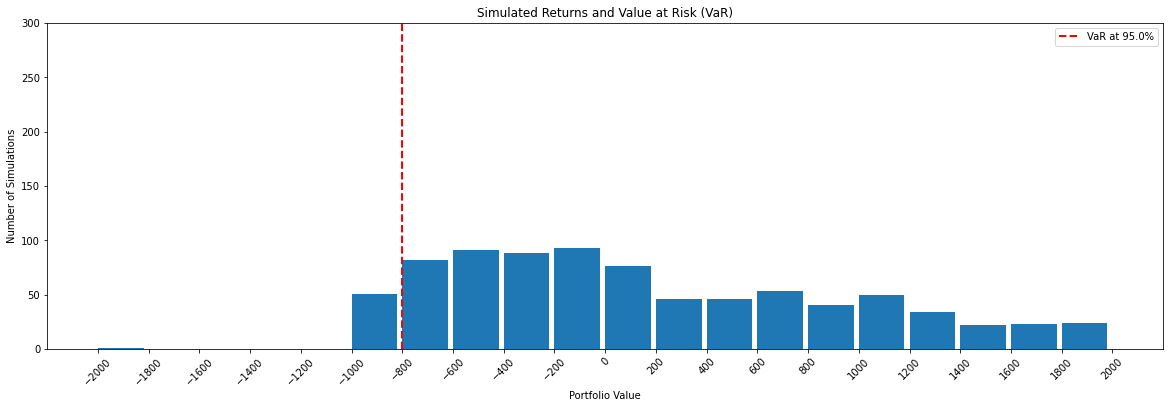

Value at Risk (VaR) at 95.0% confidence level: -802.8386532605773
Volatility: 50.0%


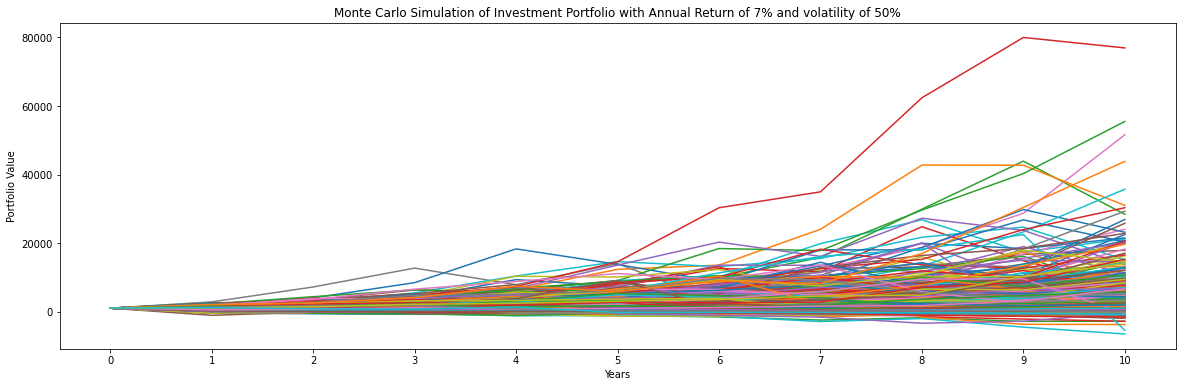

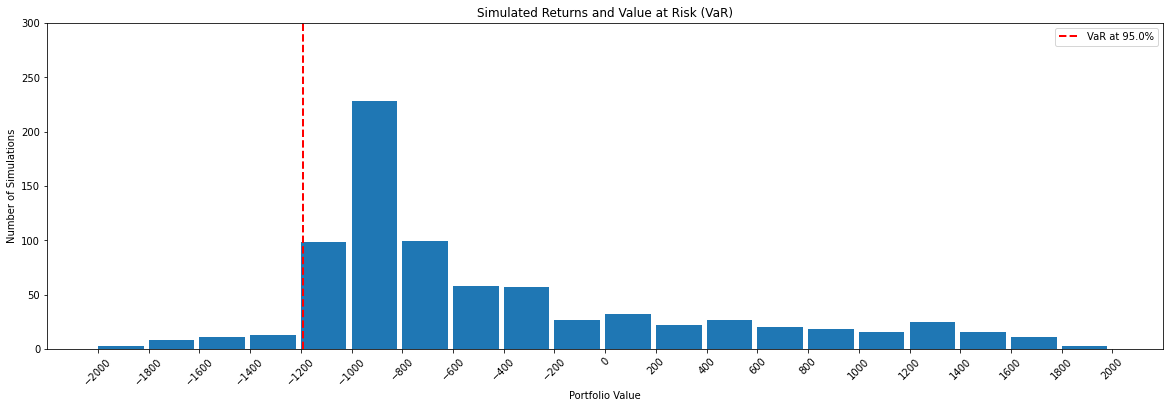

Value at Risk (VaR) at 95.0% confidence level: -1191.860909867608


In [4]:
# The actual important part: the monte carlo simulation

# running multiple simuluations for a given volatility
def monte_carlo_simulation(initial_investment, annual_return, volatility, years, num_simulations):
    simulations = []
    for _ in range(num_simulations):
        portfolio_values = [initial_investment]
        for _ in range(years):
            annual_growth_rate = randomized_annual_growth(annual_return, volatility)
            new_value = portfolio_values[-1] * (1 + annual_growth_rate)
            portfolio_values.append(new_value)
        simulations.append(portfolio_values)

    returns = [s[-1] - initial_investment for s in simulations]
    return simulations, returns


# running the simulation for all the different volatilities
for volatility in [0.05, 0.15, 0.20, 0.30, 0.50]:
    print(f"Volatility: {volatility*100}%")
    
    # Run Monte Carlo simulation
    simulations, returns = monte_carlo_simulation(initial_investment, annual_return, volatility, years, num_simulations)

    # Plot the results
    plot_simulation(simulations)

    # Calculate VaR at 95% confidence level
    sorted_returns = np.sort(returns)
    confidence_level = 0.95  # = 95% confidence level
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]

    # Plot histogram
    plot_return_distribution(returns, var)
    print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level: {var}")